In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [5]:
from tensorflow.keras.utils import to_categorical  #분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential #모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단,...
※ ML/DL의 종류
- 지도학습(독립=입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우)
    회귀분석(타겟변수가 연속형) VS 분류분석(multi, binary)
- 비지도학습(입력변수만)
    군집화
- 강화학습

※ 지도학습에서의 ML, DL 프로그래밍 방식
1. 데이터 셋 확보(input=입력변수, target=종속변수)
    원본데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
    스케일 조정
    훈련셋(학습), 검증셋, 시험셋(테스트셋)
    학습 및 평가 가능한 포맷으로 변환
3. 모델구성
    Sequential 객체 생성뒤 필요한 층을 add()함수로 추가
4. 모델학습과정 설정
    compile()함수 이용. 손실함수, optimizer, metrics(평가지표)
5. 모델 학습시키기 (ft. 학습과정 지켜보기)
    fit()함수 이용 - 훈련셋입력=독립변수 , 훈련셋타겟=종속변수, 학습횟수, 검증셋
6. 모델평가
    시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프
7. 모델사용
    predict()이용. 입력데이터는 2차원 데이터
8. 모델 저장
    save()함수를 이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음.

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [24]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋 = 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [4]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터:', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨이노딩된 데이터 :', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 :', one_hot_encoded_data)

원 데이터: ['a' 'b' 'c' 'd']
라벨이노딩된 데이터 : [0 1 2 3]
원핫인코딩된 데이터 : [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 위해, tatget을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :', get_dumies_one_hot)

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [25]:
# 분류분석을 위한 target변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)
Y_test  = to_categorical(y_test)

In [26]:
print('훈련셋 구조 :', x_train.shape, Y_train.shape) # 독립변수 1개, 타겟변수 19
print('검증셋 구조 :', x_val.shape, Y_val.shape)
print('테스트셋 구조 :', x_test.shape, Y_test.shape)

훈련셋 구조 : (90,) (90, 19)
검증셋 구조 : (9,) (9, 19)
테스트셋 구조 : (9,) (9, 19)


# 3. 모델 구성하기

In [7]:
model = Sequential()
model.add(Input(shape=(1,)))# 입력층
model.add(Dense(units=38, activation='sigmoid')) # units출력수, 활성화함수 :relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정

In [28]:
model.compile(loss="categorical_crossentropy", # 분류분석에서의 손실함수(원핫인코딩 있음)
             optimizer='sgd',
             metrics=['accuracy']) # 평가지표 : accuracy

# 5. 모델 학습 시키기

In [29]:
hist = model.fit(x_train, Y_train,
                epochs=300,
                batch_size=10,
                verbose=2, # 학습결과 출력 옵션 0 : 출력없음. 1:기본값, 2:에포크별로그상세추력
                validation_data=(x_val, Y_val)
                )

Epoch 1/300
9/9 - 0s - loss: 3.1243 - accuracy: 0.1111 - val_loss: 3.0253 - val_accuracy: 0.1111 - 467ms/epoch - 52ms/step
Epoch 2/300
9/9 - 0s - loss: 2.9784 - accuracy: 0.1111 - val_loss: 2.9065 - val_accuracy: 0.1111 - 43ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.8734 - accuracy: 0.1111 - val_loss: 2.8159 - val_accuracy: 0.1111 - 43ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.7911 - accuracy: 0.1111 - val_loss: 2.7443 - val_accuracy: 0.1111 - 47ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.7260 - accuracy: 0.1111 - val_loss: 2.6837 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.6681 - accuracy: 0.1111 - val_loss: 2.6307 - val_accuracy: 0.1111 - 45ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.6169 - accuracy: 0.1111 - val_loss: 2.5829 - val_accuracy: 0.1111 - 46ms/epoch - 5ms/step
Epoch 8/300
9/9 - 0s - loss: 2.5739 - accuracy: 0.1111 - val_loss: 2.5396 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s - loss: 2

Epoch 69/300
9/9 - 0s - loss: 1.4522 - accuracy: 0.4111 - val_loss: 1.4240 - val_accuracy: 0.5556 - 38ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 1.4433 - accuracy: 0.4778 - val_loss: 1.4148 - val_accuracy: 0.6667 - 40ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 1.4259 - accuracy: 0.5556 - val_loss: 1.4050 - val_accuracy: 0.5556 - 39ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 1.4225 - accuracy: 0.5111 - val_loss: 1.3953 - val_accuracy: 0.6667 - 42ms/epoch - 5ms/step
Epoch 73/300
9/9 - 0s - loss: 1.4045 - accuracy: 0.5000 - val_loss: 1.3859 - val_accuracy: 0.6667 - 49ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 1.3983 - accuracy: 0.5667 - val_loss: 1.3771 - val_accuracy: 0.7778 - 48ms/epoch - 5ms/step
Epoch 75/300
9/9 - 0s - loss: 1.3931 - accuracy: 0.6000 - val_loss: 1.3688 - val_accuracy: 0.5556 - 51ms/epoch - 6ms/step
Epoch 76/300
9/9 - 0s - loss: 1.3832 - accuracy: 0.5333 - val_loss: 1.3593 - val_accuracy: 0.6667 - 49ms/epoch - 5ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.9850 - accuracy: 0.8778 - val_loss: 0.9623 - val_accuracy: 0.8889 - 51ms/epoch - 6ms/step
Epoch 137/300
9/9 - 0s - loss: 0.9833 - accuracy: 0.8444 - val_loss: 0.9612 - val_accuracy: 0.7778 - 49ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 0.9796 - accuracy: 0.8222 - val_loss: 0.9532 - val_accuracy: 0.8889 - 51ms/epoch - 6ms/step
Epoch 139/300
9/9 - 0s - loss: 0.9800 - accuracy: 0.8333 - val_loss: 0.9477 - val_accuracy: 0.8889 - 55ms/epoch - 6ms/step
Epoch 140/300
9/9 - 0s - loss: 0.9691 - accuracy: 0.8889 - val_loss: 0.9458 - val_accuracy: 0.8889 - 47ms/epoch - 5ms/step
Epoch 141/300
9/9 - 0s - loss: 0.9848 - accuracy: 0.8333 - val_loss: 0.9405 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.9556 - accuracy: 0.9222 - val_loss: 0.9318 - val_accuracy: 0.8889 - 43ms/epoch - 5ms/step
Epoch 143/300
9/9 - 0s - loss: 0.9489 - accuracy: 0.9000 - val_loss: 0.9273 - val_accuracy: 0.8889 - 38ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.7110 - accuracy: 0.9000 - val_loss: 0.6820 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 204/300
9/9 - 0s - loss: 0.6947 - accuracy: 0.8778 - val_loss: 0.6750 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 205/300
9/9 - 0s - loss: 0.6849 - accuracy: 0.9778 - val_loss: 0.6681 - val_accuracy: 0.8889 - 65ms/epoch - 7ms/step
Epoch 206/300
9/9 - 0s - loss: 0.6856 - accuracy: 0.8889 - val_loss: 0.6676 - val_accuracy: 1.0000 - 51ms/epoch - 6ms/step
Epoch 207/300
9/9 - 0s - loss: 0.6889 - accuracy: 0.9222 - val_loss: 0.6636 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.6872 - accuracy: 0.9333 - val_loss: 0.6645 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.6796 - accuracy: 0.8778 - val_loss: 0.6579 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.6830 - accuracy: 0.9111 - val_loss: 0.6525 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5260 - accuracy: 0.9889 - val_loss: 0.4791 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 271/300
9/9 - 0s - loss: 0.4840 - accuracy: 0.9556 - val_loss: 0.5008 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5383 - accuracy: 0.9000 - val_loss: 0.4767 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.4898 - accuracy: 0.9333 - val_loss: 0.4617 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5059 - accuracy: 0.9444 - val_loss: 0.4610 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.4720 - accuracy: 0.9556 - val_loss: 0.4613 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.4848 - accuracy: 0.9111 - val_loss: 0.4630 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 277/300
9/9 - 0s - loss: 0.4819 - accuracy: 0.9778 - val_loss: 0.4551 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 278/300
9/

# 6. 모델평가하기(모델 학습과정 살펴보고, evalute)

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

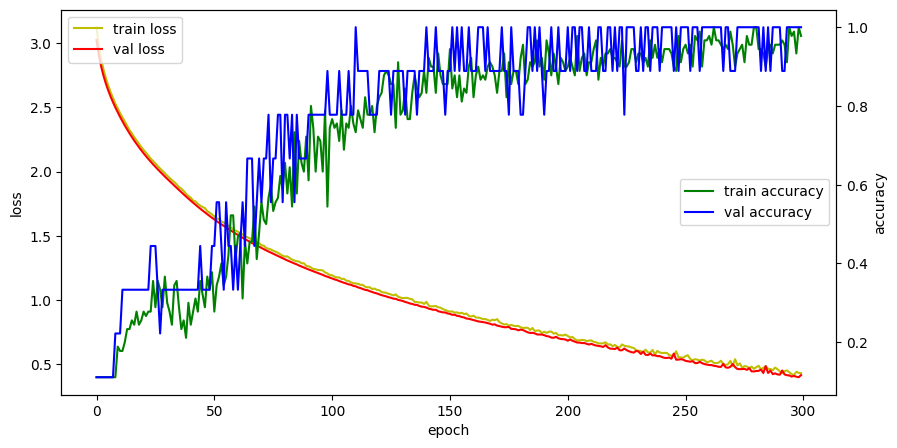

In [30]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [31]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 1.0000


In [32]:
score # loss, accuracy

[0.4148350954055786, 1.0]

In [33]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 0.4148350954055786
평가된 accuracy : 100.0 %


# 7. 모델 사용하기

In [34]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 60ms/step


array([[4.83542329e-12, 6.40118080e-12, 9.22902375e-02, 1.28434741e-12,
        7.93506682e-01, 3.53426533e-12, 1.13467194e-01, 3.16125182e-11,
        7.35450420e-04, 1.51495982e-12, 4.13944406e-07, 4.28484451e-13,
        1.46933160e-10, 5.09497026e-14, 2.77712450e-13, 4.98465748e-11,
        4.54196758e-19, 2.41162316e-11, 7.94463198e-25]], dtype=float32)

In [35]:
# 분류분석의 예측은 predict()후 argmax()
model.predict(np.array([[2]])).argmax()

1/1 [==============================] - 0s 21ms/step


4

In [36]:
# 4를 몇%확률로 예측했는지?
H[0, H.argmax()]*100

79.35066819190979

# 7. 모델 저장하기

In [37]:
# model.save('model/02_deep.h5')
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

## 저장된 모델 사용하기

In [2]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')

In [3]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 38)                76        
                                                                 
 dense_5 (Dense)             (None, 64)                2496      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [8]:
data = np.array([[2],
                 [3]])
predictions = model.predict(data)
predictions

1/1 [==============================] - 0s 213ms/step


array([[0.06592948, 0.06849714, 0.04110867, 0.0358652 , 0.04908619,
        0.03987683, 0.07696008, 0.0645326 , 0.0575591 , 0.04740672,
        0.0326909 , 0.05757444, 0.05356486, 0.03242625, 0.04970352,
        0.07711137, 0.06393892, 0.04709888, 0.0390688 ],
       [0.06684425, 0.06857079, 0.03981613, 0.03859943, 0.05045055,
        0.04033109, 0.07799793, 0.06110502, 0.05369918, 0.04923232,
        0.03356862, 0.05735354, 0.05642837, 0.03129095, 0.05429719,
        0.07571074, 0.06528486, 0.04473537, 0.03468368]], dtype=float32)

In [9]:
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=-1)

In [12]:
import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(model, data):
    predictions = model(data, training=False)
    return tf.argmax(predictions, axis=-1)

In [13]:
import numpy as np
input_data = int(input('어떤 데이터를 예측할까요?'))
data = np.array([[input_data]])
print('예측된 분류는', predict_classes(model2, data))

어떤 데이터를 예측할까요?6
예측된 분류는 tf.Tensor([12], shape=(1,), dtype=int64)
